<a href="https://colab.research.google.com/github/AtfastrSlushyMaker/pl-standings-prediction-project/blob/main/notebooks/exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [280]:
# Import necessary libraries for data manipulation, analysis, and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [281]:
# Load the dataset from a CSV file into a pandas DataFrame.
df = pd.read_csv('premier_league_combined.csv')

In [282]:
# Convert the 'Date' column to datetime objects for time-based analysis.
df['Date'] = pd.to_datetime(df['Date'])

In [283]:
# Display the first 5 rows of the DataFrame to get a quick overview of the data structure and content.
df.head()

,Season,SourceFile,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,1993-94,season-9394.csv,1993-08-14,Arsenal,Coventry,0,3,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,season-9394.csv,1993-08-14,Aston Villa,QPR,4,1,H,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,season-9394.csv,1993-08-14,Chelsea,Blackburn,1,2,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,season-9394.csv,1993-08-14,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,season-9394.csv,1993-08-14,Man City,Leeds,1,1,D,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [284]:
# Display the last 5 rows of the DataFrame to see the most recent entries in the dataset.
df.tail()

,Season,SourceFile,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
12319,2024-25,season-2425.csv,2025-05-25,Newcastle,Everton,0,1,A,0.0,0.0,...,6.0,6.0,12.0,9.0,12.0,3.0,1.0,4.0,0.0,0.0
12320,2024-25,season-2425.csv,2025-05-25,Nott'm Forest,Chelsea,0,1,A,0.0,0.0,...,2.0,2.0,10.0,11.0,7.0,4.0,2.0,2.0,0.0,0.0
12321,2024-25,season-2425.csv,2025-05-25,Southampton,Arsenal,1,2,A,0.0,1.0,...,2.0,8.0,7.0,8.0,5.0,8.0,0.0,0.0,0.0,0.0
12322,2024-25,season-2425.csv,2025-05-25,Tottenham,Brighton,1,4,A,1.0,0.0,...,2.0,8.0,13.0,8.0,2.0,11.0,3.0,1.0,0.0,0.0
12323,2024-25,season-2425.csv,2025-05-25,Wolves,Brentford,1,1,D,0.0,1.0,...,6.0,7.0,7.0,9.0,8.0,3.0,2.0,1.0,0.0,0.0


In [285]:
# Calculate and print descriptive statistics for the numerical columns in the DataFrame.
print("\nDescriptive statistics:")
display(df.describe())


Descriptive statistics:


,Date,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
count,12324,12324.000000,12324.000000,11400.000000,11400.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000
mean,2009-04-21 14:47:12.327166464,1.530996,1.163827,0.691228,0.511754,13.611895,10.803789,5.980421,4.695263,11.285368,11.773579,6.037263,4.770421,1.465579,1.788947,0.062632,0.085579
min,1993-08-14 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2001-02-10 00:00:00,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,9.000000,9.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,2009-03-22 00:00:00,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,4.000000,11.000000,12.000000,6.000000,4.000000,1.000000,2.000000,0.000000,0.000000
75%,2017-04-29 06:00:00,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,8.000000,6.000000,14.000000,14.000000,8.000000,6.000000,2.000000,3.000000,0.000000,0.000000
max,2025-05-25 00:00:00,9.000000,9.000000,5.000000,5.000000,43.000000,37.000000,24.000000,20.000000,33.000000,29.000000,20.000000,19.000000,7.000000,9.000000,3.000000,2.000000
std,NaN,1.307882,1.147353,0.840313,0.731435,5.347962,4.700194,3.266755,2.749782,3.751680,3.920356,3.108943,2.751954,1.216692,1.288961,0.253356,0.290826


In [286]:
# Group the DataFrame by 'Season' and count the number of matches in each season.
matches_per_season = df.groupby('Season').size()
# Print the number of matches played in each season.
print(matches_per_season)

Season
1993-94    462
1994-95    462
1995-96    380
1996-97    380
1997-98    380
1998-99    380
1999-00    380
2000-01    380
2001-02    380
2002-03    380
2003-04    380
2004-05    380
2005-06    380
2006-07    380
2007-08    380
2008-09    380
2009-10    380
2010-11    380
2011-12    380
2012-13    380
2013-14    380
2014-15    380
2015-16    380
2016-17    380
2017-18    380
2018-19    380
2019-20    380
2020-21    380
2021-22    380
2022-23    380
2023-24    380
2024-25    380
dtype: int64


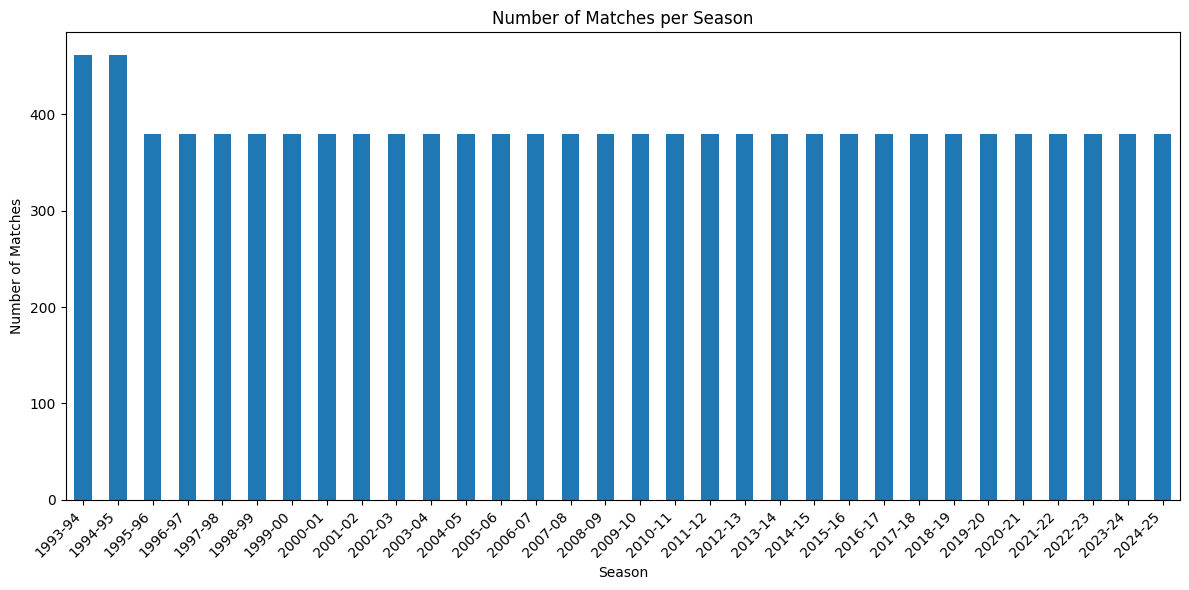

In [294]:
# Visualize the number of matches per season.
plt.figure(figsize=(12, 6))
matches_per_season.plot(kind='bar')
plt.title('Number of Matches per Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [287]:
# Calculate the percentage of matches won by the home team and the away team.
home_wins = (df['FTR'] == 'H').mean()
away_wins = (df['FTR'] == 'A').mean()
# Print the calculated percentages.
print("Home wins:", home_wins)
print("Away wins:", away_wins)

Home wins: 0.45723790976955536
Away wins: 0.2878123985718922


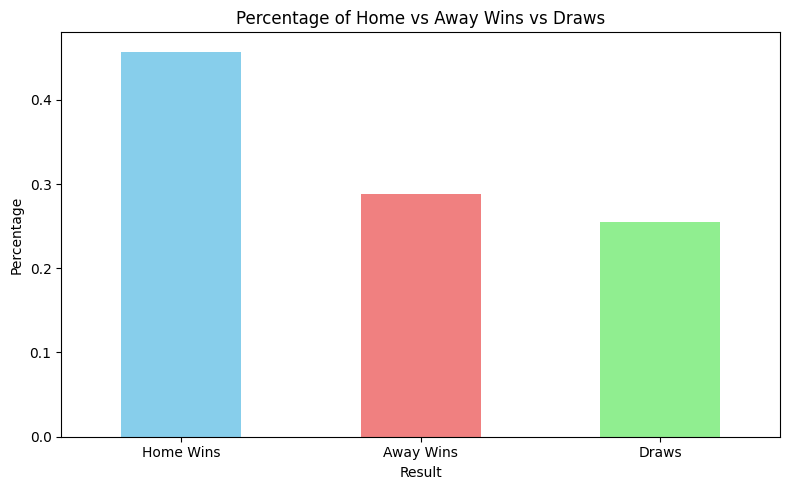

In [295]:
# Visualize the percentage of home and away wins.
plt.figure(figsize=(8, 5))
win_percentages = pd.Series({'Home Wins': home_wins, 'Away Wins': away_wins, 'Draws': 1 - home_wins - away_wins})
win_percentages.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Percentage of Home vs Away Wins vs Draws')
plt.xlabel('Result')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [288]:
# Print the value counts for the 'FTR' (Full Time Result) column to show the distribution of home wins, away wins, and draws.
print("\nFull Time Result value counts:")
print(df['FTR'].value_counts())


Full Time Result value counts:
FTR
H    5635
A    3547
D    3142
Name: count, dtype: int64


In [289]:
# Print the shape of the DataFrame (number of rows and columns).
print("Dataset shape:", df.shape)

Dataset shape: (12324, 24)


In [290]:
# Print concise summary of the DataFrame, including the index dtype and column dtypes, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12324 entries, 0 to 12323
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Season      12324 non-null  object        
 1   SourceFile  12324 non-null  object        
 2   Date        12324 non-null  datetime64[ns]
 3   HomeTeam    12324 non-null  object        
 4   AwayTeam    12324 non-null  object        
 5   FTHG        12324 non-null  int64         
 6   FTAG        12324 non-null  int64         
 7   FTR         12324 non-null  object        
 8   HTHG        11400 non-null  float64       
 9   HTAG        11400 non-null  float64       
 10  HTR         11400 non-null  object        
 11  Referee     9500 non-null   object        
 12  HS          9500 non-null   float64       
 13  AS          9500 non-null   float64       
 14  HST         9500 non-null   float64       
 15  AST         9500 non-null   float64       
 16  HF          9500 non-n

In [293]:
# Calculate and print the number of missing values for each column.
print(df.isnull().sum())
# Print the total number of missing cells in the DataFrame.
print("Total Missing Cells:", df.isnull().sum().sum())

Season           0
SourceFile       0
Date             0
HomeTeam         0
AwayTeam         0
FTHG             0
FTAG             0
FTR              0
HTHG           924
HTAG           924
HTR            924
Referee       2824
HS            2824
AS            2824
HST           2824
AST           2824
HF            2824
AF            2824
HC            2824
AC            2824
HY            2824
AY            2824
HR            2824
AR            2824
dtype: int64
Total Missing Cells: 39484


In [292]:
# Print the DataFrame's isnull method, which returns a boolean DataFrame of the same shape as the original, indicating whether each element is NaN.
print(df.isnull)

<bound method DataFrame.isnull of         Season       SourceFile       Date       HomeTeam        AwayTeam  \
0      1993-94  season-9394.csv 1993-08-14        Arsenal        Coventry   
1      1993-94  season-9394.csv 1993-08-14    Aston Villa             QPR   
2      1993-94  season-9394.csv 1993-08-14        Chelsea       Blackburn   
3      1993-94  season-9394.csv 1993-08-14      Liverpool  Sheffield Weds   
4      1993-94  season-9394.csv 1993-08-14       Man City           Leeds   
...        ...              ...        ...            ...             ...   
12319  2024-25  season-2425.csv 2025-05-25      Newcastle         Everton   
12320  2024-25  season-2425.csv 2025-05-25  Nott'm Forest         Chelsea   
12321  2024-25  season-2425.csv 2025-05-25    Southampton         Arsenal   
12322  2024-25  season-2425.csv 2025-05-25      Tottenham        Brighton   
12323  2024-25  season-2425.csv 2025-05-25         Wolves       Brentford   

       FTHG  FTAG FTR  HTHG  HTAG  ...  H

In [291]:
# Calculate and print the percentage of missing values for each column in the DataFrame.
print("\nMissing values percentage:")
print(df.isnull().mean() * 100)


Missing values percentage:
Season         0.000000
SourceFile     0.000000
Date           0.000000
HomeTeam       0.000000
AwayTeam       0.000000
FTHG           0.000000
FTAG           0.000000
FTR            0.000000
HTHG           7.497566
HTAG           7.497566
HTR            7.497566
Referee       22.914638
HS            22.914638
AS            22.914638
HST           22.914638
AST           22.914638
HF            22.914638
AF            22.914638
HC            22.914638
AC            22.914638
HY            22.914638
AY            22.914638
HR            22.914638
AR            22.914638
dtype: float64


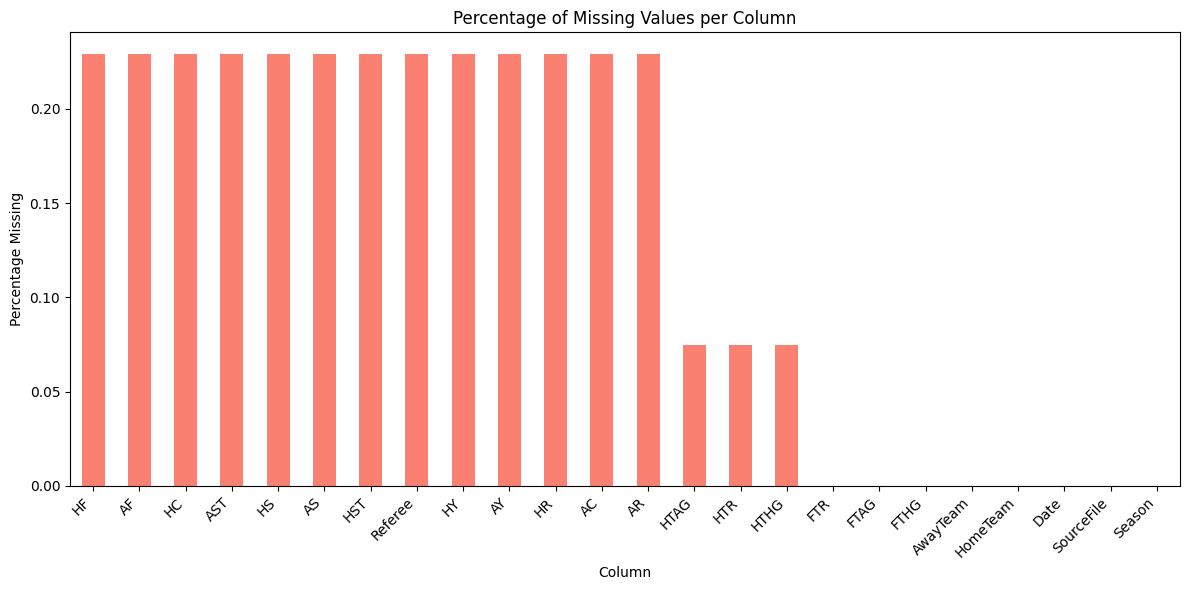

In [297]:
# Visualize the percentage of missing values per column.
plt.figure(figsize=(12, 6))
df.isnull().mean().sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title('Percentage of Missing Values per Column')
plt.xlabel('Column')
plt.ylabel('Percentage Missing')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()